### In this assignment, we use photos from Large-scale CelebFaces Attributes (CelebA) Dataset to train convets that can classify photos into male celebrities and female celebrities accurately.

###To make this problem more challenging, we only use 2,000 photos for training, 1,000 photos for validation, and 1,000 photos for testing.

###For the first part of the assignment, following the example of chapter 8.2. Here we train our model using only the 2,000 training photos. Note we need to use data augmentation and dropout to fight overfiting. This part is worth 40 points.

###For the second part, we use a pretrained convet (VGG16) to help with our task. Do the fast feature extraction without augmentation following chapter 8.3.1. And do the fine-tuning following chapter 8.3.2. This part is worth 60 points.

###Important information before you start: all the photos are of the size (218, 178), where height = 218, and width = 178.

###Finally, we should be able to achieve 94% of accuracy following the code provided by this module. Not much changes are needed.

Before we start, we need to copy hw6.zip to Google drive. And then we need to mount the Google drive using the following statements.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We then unzip hw6.zip.

In [3]:
!unzip /content/drive/My\ Drive/hw6.zip

Archive:  /content/drive/My Drive/hw6.zip
   creating: hw6/
   creating: hw6/test/
  inflating: hw6/test/.DS_Store      
   creating: hw6/test/male/
  inflating: hw6/test/male/003676.jpg  
  inflating: hw6/test/male/003258.jpg  
  inflating: hw6/test/male/003879.jpg  
  inflating: hw6/test/male/003025.jpg  
  inflating: hw6/test/male/003497.jpg  
  inflating: hw6/test/male/003108.jpg  
  inflating: hw6/test/male/003044.jpg  
  inflating: hw6/test/male/003206.jpg  
  inflating: hw6/test/male/003638.jpg  
  inflating: hw6/test/male/003311.jpg  
  inflating: hw6/test/male/003600.jpg  
  inflating: hw6/test/male/003032.jpg  
  inflating: hw6/test/male/003360.jpg  
  inflating: hw6/test/male/003825.jpg  
  inflating: hw6/test/male/003159.jpg  
  inflating: hw6/test/male/003805.jpg  
  inflating: hw6/test/male/003364.jpg  
  inflating: hw6/test/male/003153.jpg  
  inflating: hw6/test/male/003274.jpg  
  inflating: hw6/test/male/003077.jpg  
  inflating: hw6/test/male/003773.jpg  
  inflating

In [4]:
import keras
keras.__version__

'2.15.0'

In [5]:
import os, shutil

In [6]:
base_dir = '/content//hw6'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training male pictures
train_male_dir = os.path.join(train_dir, 'male')

# Directory with our training female pictures
train_female_dir = os.path.join(train_dir, 'female')

# Directory with our validation male pictures
validation_male_dir = os.path.join(validation_dir, 'male')

# Directory with our validation female pictures
validation_female_dir = os.path.join(validation_dir, 'female')

# Directory with our validation male pictures
test_male_dir = os.path.join(test_dir, 'male')

# Directory with our validation female pictures
test_female_dir = os.path.join(test_dir, 'female')

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [7]:
print('total training male images:', len(os.listdir(train_male_dir)))

total training male images: 825


In [8]:
print('total training female images:', len(os.listdir(train_female_dir)))

total training female images: 1175


In [9]:
print('total validation male images:', len(os.listdir(validation_male_dir)))

total validation male images: 413


In [10]:
print('total validation female images:', len(os.listdir(validation_female_dir)))

total validation female images: 587


In [11]:
print('total test male images:', len(os.listdir(test_male_dir)))

total test male images: 412


In [12]:
print('total test female images:', len(os.listdir(test_female_dir)))

total test female images: 588


###Finish the rest by modifying the code provided in this module.

Note not much changes expected.

Just make sure the model fine_turning.h5 is trained using 50 epochs.

Below is the test accuracy obtained from one of the runs.

In total, it takes rougly 10 minutes to finish when using GPU.

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [23]:
model.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

Data Preprocessing

In [15]:
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory


train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [16]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [17]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [18]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [19]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset

In [20]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fitting the model using a Dataset

configuring the model for training

In [24]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 12s 79ms/step - loss: 0.7017 - accuracy: 0.5890 - val_loss: 0.6346 - val_accuracy: 0.6750
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 5s 78ms/step - loss: 0.6031 - accuracy: 0.6855 - val_loss: 0.5233 - val_accuracy: 0.7370
Epoch 3/30
63/63 [==============================] - 4s 60ms/step - loss: 0.5117 - accuracy: 0.7565 - val_loss: 0.6028 - val_accuracy: 0.7390
Epoch 4/30
63/63 [==============================] - 4s 55ms/step - loss: 0.4311 - accuracy: 0.8070 - val_loss: 0.3655 - val_accuracy: 0.8210
Epoch 5/30
63/63 [==============================] - 6s 83ms/step - loss: 0.2849 - accuracy: 0.8770 - val_loss: 0.2972 - val_accuracy: 0.8730
Epoch 6/30
63/63 [==============================] - 5s 82ms/step - loss: 0.2151 - accuracy: 0.9125 - val_loss: 0.7900 - val_accuracy: 0.7240
Epoch 7/30
63/63 [==============================] - 7s 110ms/step - loss: 0.1823 - accuracy: 0.9280 - val_loss: 0.2014 - val_accuracy: 0.9190
Epoch 8/30
63/63 [==============================] - 7s 109ms/step - loss: 0.1241 - accuracy: 0.9550 - val_loss: 0.2356 - val_accuracy: 0.9170
Epoch 9/30
63/63 [====

Displaying curves of loss and accuracy during training

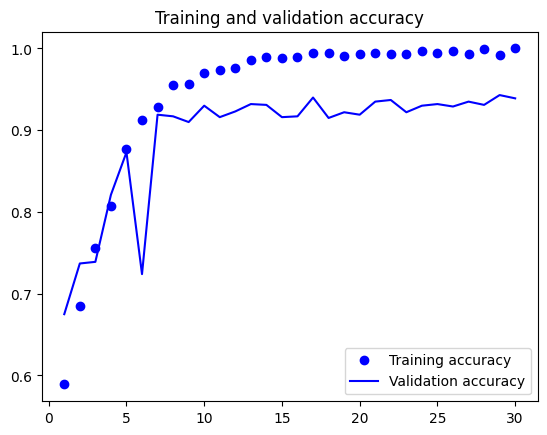

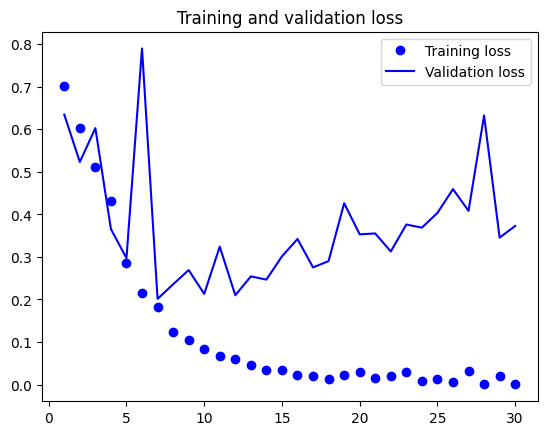

In [25]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [28]:
test_model = keras.models.load_model("convnet_from_scratch.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 25ms/step - loss: 0.2028 - accuracy: 0.9220
Test accuracy: 0.922


Part 1: Using Data Augumentation

Define a data augmentation stage to add to an image model

In [27]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Displaying some randomly augmented training images

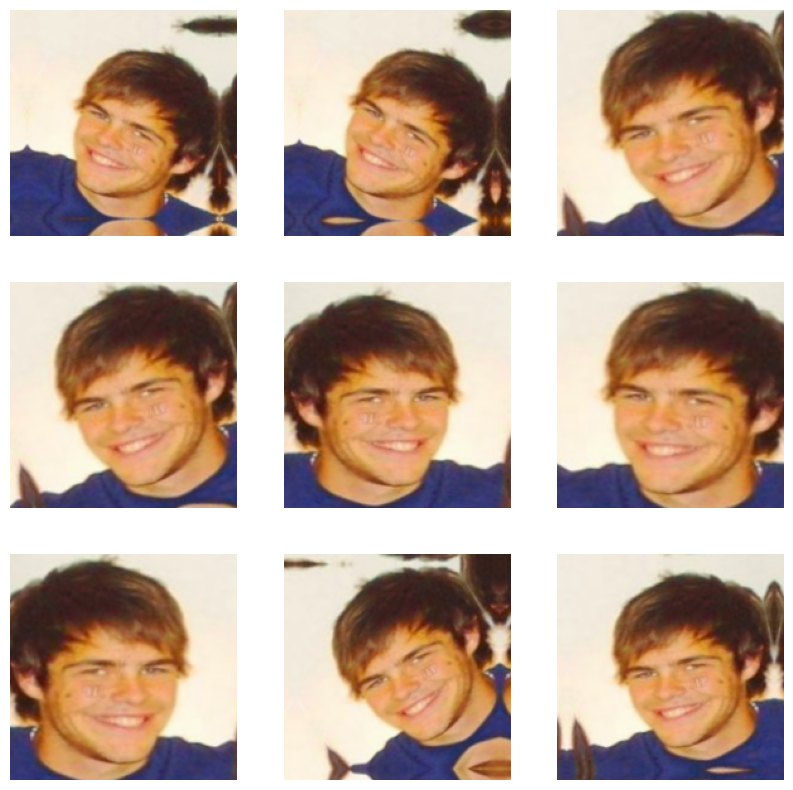

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Defining a new convnet that includes image augmentation and dropout

In [30]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 9s 57ms/step - loss: 0.6942 - accuracy: 0.5750 - val_loss: 0.6545 - val_accuracy: 0.7170
Epoch 2/100
63/63 [==============================] - 5s 83ms/step - loss: 0.5999 - accuracy: 0.6910 - val_loss: 0.7454 - val_accuracy: 0.6670
Epoch 3/100
63/63 [==============================] - 4s 58ms/step - loss: 0.5550 - accuracy: 0.7350 - val_loss: 0.5816 - val_accuracy: 0.7240
Epoch 4/100
63/63 [==============================] - 6s 90ms/step - loss: 0.5099 - accuracy: 0.7630 - val_loss: 0.4958 - val_accuracy: 0.7740
Epoch 5/100
63/63 [==============================] - 4s 54ms/step - loss: 0.4566 - accuracy: 0.8045 - val_loss: 0.3438 - val_accuracy: 0.8500
Epoch 6/100
63/63 [==============================] - 4s 57ms/step - loss: 0.3912 - accuracy: 0.8370 - val_loss: 0.3387 - val_accuracy: 0.8550
Epoch 7/100
63/63 [==============================] - 5s 77ms/step - loss: 0.3424 - accuracy: 0.8615 - val_loss: 0.3704 - val_accuracy: 0.8270
Epoch 

Evaluating the model on the test set

In [32]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 53ms/step - loss: 0.1539 - accuracy: 0.9450
Test accuracy: 0.945


# PART 2: Using a pretrained convet (VGG16) to help with our task. We do fast feature extraction without augmentation.

### Feature extraction with a pretrained model

Instantiating the VGG16 convolutional base

In [33]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [34]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Fast feature extraction without data augmentation**

Extracting the VGG16 features and corresponding labels

In [35]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 72ms/step



Defining and training the densely connected classifier

In [36]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.h5",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 12ms/step - loss: 8.9687 - accuracy: 0.8630 - val_loss: 5.5888 - val_accuracy: 0.9020
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.2759 - accuracy: 0.9455 - val_loss: 7.8720 - val_accuracy: 0.8660
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6698 - accuracy: 0.9600 - val_loss: 5.7538 - val_accuracy: 0.9040
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9657 - accuracy: 0.9710 - val_loss: 16.1310 - val_accuracy: 0.7940
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.7775 - accuracy: 0.9785 - val_loss: 6.1555 - val_accuracy: 0.9040
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5824 - accuracy: 0.9760 - val_loss: 7.3451 - val_accuracy: 0.9050
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.4204 - accuracy: 0.9850 - val_loss: 5.2197 - val_accuracy: 0.9320
Epoch 8/20
63/63 [

Plotting the results

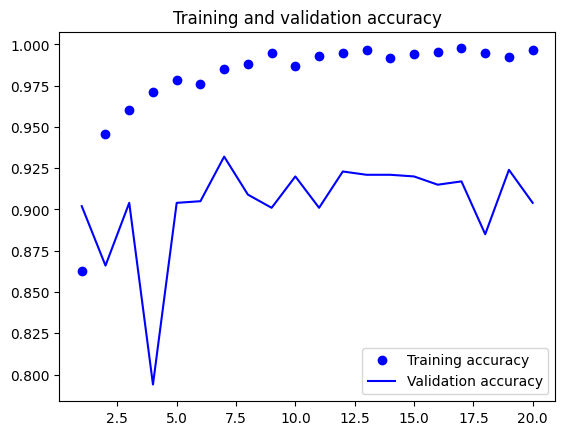

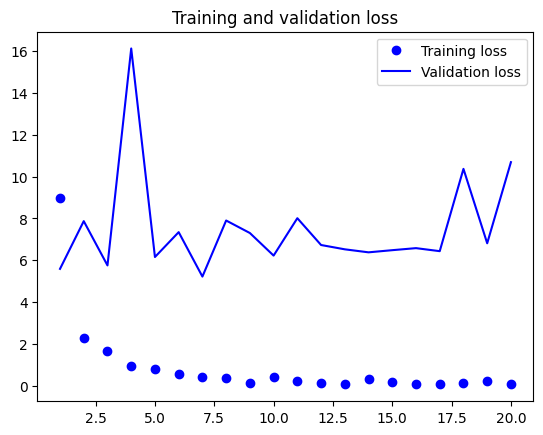

In [37]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on test data

In [38]:
test_model = keras.models.load_model(
    "feature_extraction.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 5, 5, 512), found shape=(None, 180, 180, 3)


Fine Tuning the Pretrainined model

In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Freezing all layers until the fourth from the last

In [40]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [41]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 5, 5, 512), found shape=(None, 180, 180, 3)


In [ ]:
model = keras.models.load_model("fine_tuning.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

OSError: No file or directory found at fine_tuning.h5